<a href="https://colab.research.google.com/github/cAnnBurns/Quarknet-Coding-Camp-2/blob/main/Theta_%26_Phi_Graphing_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Theta & Phi Graphing Activity
This is a Jupyter notebook with blocks of code called cells. You can press shift+ENTER or click the play button at left to run a cell and go on to the next one. You can also edit the code and run it again to see how the output changes.

You may see a popup window the first time saying "Warning". Don't worry, it's safe. Click on "run anyway".

Try running the following cells by pressing SHIFT and ENTER (at the same time) for each one.

You won't hurt anything by experimenting. If you break it, close the tab and open the activity again to start over. If you want to save the changes you made, you can create a copy that will live in your Google Drive and belong to you.

###Here's some background info on the detector that was used to collect this data

The CMS detector uses several angles to describe the path of the collision products.

<div>
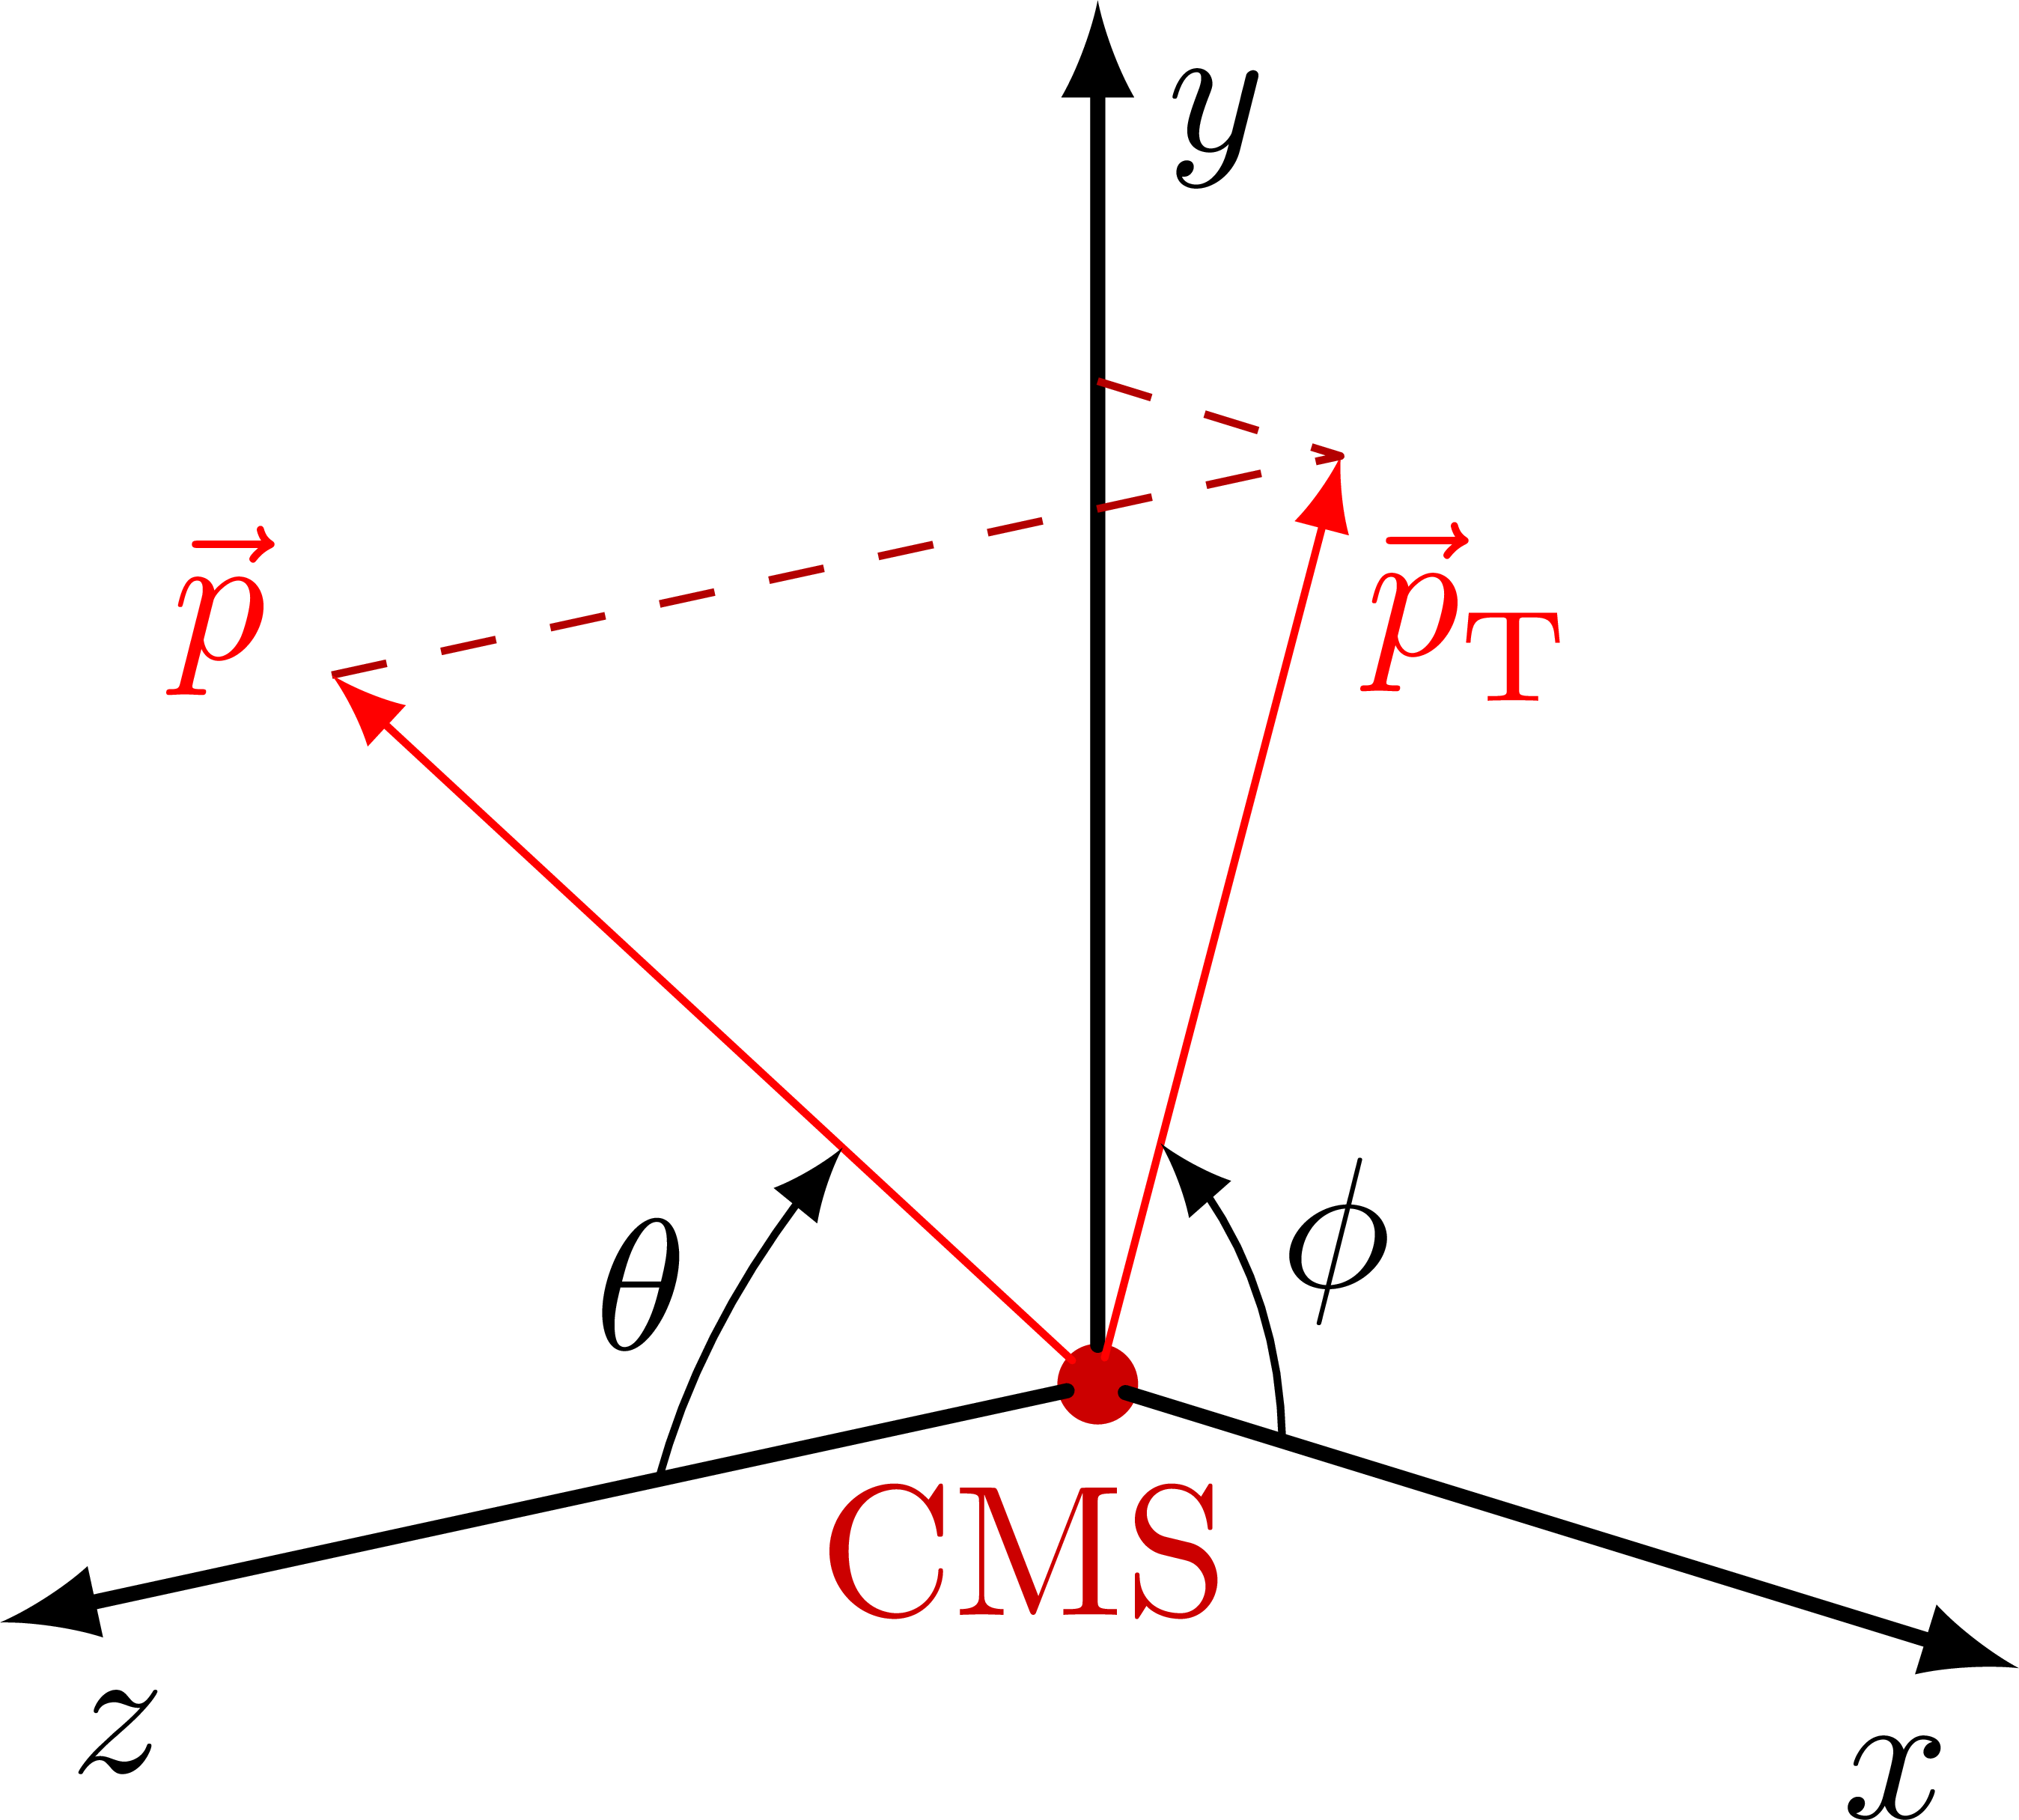
</div>

The beamline, AKA the direction the protons move, is aligned with the $z$ axis, and the $x$ and $y$ axis represent the plane transverse to the beamline. After the proton-proton collision, particles come flying out in all directions.
The polar angle $\theta$ measures the particle's direction relative to the beamline, while $\phi$ measures the particle's angle in the transverse plane.

Here's a couple of sites to browse if you need a bit more detail.
* [Image of CMS Detector](https://cms.cern/sites/default/files/2022-06/detector_stripe01-min_0_0.jpeg)
* [Geometry of a Collider Detector](https://quarknet.org/page/geometry-collider-detector)
* [CMS Coordinate System](https://tikz.net/axis3d_cms/)

In [ ]:
# Installing some extra programs to help us (this may take a minute the first time this is run)
!pip -q install gdown==4.6.0

# Importing some useful tools
import pandas as pd # <-- Pandas lets us easily create and use data tables, which are called "dataframes" in Python
import numpy as np # <-- Numpy is useful for doing math on a large amount of data
from matplotlib import pyplot as plt # <-- Pyplot to create pretty graphs
import gdown # <- Gdown lets us easily download public files from Google Drive

# The "as" command allows us to use pd, np and plt as abbreviations for those

In [ ]:
#@title Choose your dataset from the list below. (Click the dropdown arrow if you'd like to see the code)
#@markdown ###Then click the play button for this cell.
dataset = "Electron" # @param ["Electron", "Muon"] {allow-input: false}

# Load in the electron dataset if selected
if dataset == "Electron":
  # Getting the info about the file
  file_id ="17I_r75CK-19ixyG-czq9iphHwD3p4qsV" # This is the GDrive file ID
  file_name = "Electron.csv" # The name to save the file as
  gdown.download(id=file_id, output=file_name) # Download the file
  data = pd.read_csv(file_name) # Load the file into a data table

  # Removing columns we don't need and creating a few we will use
  data["theta_rad"] = 2 * np.arctan(np.exp(-1 * data.eta))
  data["theta_deg"] = np.degrees(data["theta_rad"])
  data = data.drop(["entry", "subentry", "run", "luminosityBlock", "event","nElectron", "pt", "eta", "charge", "pfRelIso03_all", "dxy", "dxyErr", "dz", "dzErr", "cutBasedId", "pfId", "sip3d"], axis = 1)


# This code only runs if you've chosen the Muon Dataset
elif dataset == "Muon":
  # Getting the info about the file
  file_id ="1ykN2rQ2MsNt-F_Ky4lliaaWx5O_8oiPn" # This is the GDrive file ID
  file_name = "Muon.csv" # The name to save the file as
  gdown.download(id=file_id, output=file_name) # Download the file
  data = pd.read_csv(file_name) # Load the file into a data table

  # Removing columns we don't need and creating a few we will use
  data["theta_rad"] = 2 * np.arctan(np.exp(-1 * data.eta))
  data["theta_deg"] = np.degrees(data["theta_rad"])
  data = data.drop(["entry", "subentry", "luminosityBlock", "event", "nMuon", "pt", "charge", "pfRelIso03_all", "pfRelIso04_all"], axis = 1)

print("Dataset loaded")

In [ ]:
# Splitting the dataset up into 3 different sizes so we can explore how the number of datapoints affects the plots
small = data.iloc[:5000,:].copy()
medium = data.iloc[:300_000,:].copy()
large = data.copy()

In [ ]:
# You can look at the size of each file by using the shape command to see the number of rows and columns
# This command shows the size of the large dataset
large.shape

# Try using this to determine the shape of the "small" and/or "medium" file! (Replace data with small, medium)

In [ ]:
# You can see the headers by using the .head command; in this example we will display the first 5 rows of the dataframe.
large.head(5)

# Checkpoint 1:
* How many data points are there in each dataset? Hint: Use the ```.shape``` command
* What are the column titles in each dataset? What do they refer to? Hint: Use the ```.head()``` command

Once you feel comfortable describing the dataset, move on to analyzing it. Below are some lines of code that will plot the transverse angle $\phi$ as a histogram. Some choices made in the code are deliberately bad. Make changes to the code as appropriate.


In [ ]:
# Create a histogram of the small data set. In this case, we're using the phi column.
plt.hist(small["phi"], bins = 5, range = [0,10])
plt.title("I'm a title")
plt.xlabel("I'm an X-axis label")
plt.ylabel("I'm a Y-axis label")
plt.show()

# Checkpoint 2

* Does your histogram now give you meaningful information about the particles that resulted from the p-p collisions?
* Do you see patterns?
* Do these patterns persist if you change the number of bins, or the plot range?
* What changes if you decide to plot $\theta$ insead of $\phi$? Is there anything interesting there?

Below, you can take a second look at the data, but with error bars added to the histogram.

In [ ]:
# Here's the same histogram from above but with error bars added.
# For this example, we're using the square root of the count as the uncertainity

# Creating the histogram and saving the number of bins, and their edges as variables
n, bin_edges, _ = plt.hist(small["phi"], bins = 5, range = [0,10], color = 'r')

# Calculating the center of each bin
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Adding error bars to the plot. Feel free to experiment with changing the fmt, ecolor and capsize
plt.errorbar(bin_centers, n, yerr = np.sqrt(n), fmt = ".", ecolor = 'k', capsize = 5)

plt.show()

# Your Task:
* Make a <b>claim</b> about how phi is distributed in the histogram, and <i><u>justify</i></u> this claim using <b>evidence</b> from your plot and <b>reasoning</b> based on arguments about the physics of the collisions, the design of the hardware, and/or the software used to gather the data.
* Adjust the bin width, plot range, and amount of data. Add error bars to your plot.
 * Did any of these changes affect your claim? If so how?
* Repeat this process using theta instead of phi.

When prompted, share your CER statement with the other members of your group.
